# Logic Regression

对于样本: $\{x_{1}, y_{1}\}, \{x_{2}, y_{2}\},\dots,\{x_{m}, y_{m}\}$

### 假设函数:

需求: $0 \leq h_{\theta} \leq 1$

则:
$$
h_{\theta}(x) = g(\theta^T\cdot x) \\
g(z) = \frac{1}{1 + e^{-z}}
$$

$h_{\theta}(x)$ 表示为概率
$$
h_{\theta}(x)=P(y=1|x;θ)=1−P(y=0|x;θ) \\
P(y=0|x;θ)+P(y=1|x;θ)=1
$$

可令:
当 $h_{\theta}(x) \geq 0.5$ 时, $y = 1$;
当 $h_{\theta}(x) \lt 0.5$ 时, $y = 0$;

### 代价函数:

$$
J_{\theta} = \frac{1}{m}\sum_{i=1}^{m}(Cost(h_{\theta}(x^{(i)}), y^{(i)})\\
\begin{array}{ll}
Cost(h_{\theta}(x), y) = -log(h_{\theta}(x)) & \textrm{if y == 1}\\
Cost(h_{\theta}(x), y) = -log(1 - h_{\theta}(x)) & \textrm{if y == 0}
\end{array}
$$

简化版:
$$
J_{\theta} = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_{\theta}(x^{(i)}) + (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))]
$$

向量化:
$$
h = g(X\cdot\Theta) \\
J_θ = -\frac{1}{m}(y^Tlog(h)+(1−y)^Tlog(1−h))
$$

### 梯度下降算法

$\alpha$ : 学习速率

$$
\begin{align*}
& \text{repeat until convergence } \{ \\
& \quad\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial\theta_{j}}J_{(\theta)} \\
& \} \\
\end{align*}
$$

计算导数后得：

$$
\begin{align*}
& \text{repeat until convergence } \{ \\
& \quad\theta_{j} := \theta_{j} - \frac{\alpha}{m}\sum_{i=1}^m[(h_{\theta}(x^{(i)}) - y^{(i)})\cdot x_{j}] \\
& \} \\
\end{align*}
$$

注：$\{\theta_{0},\theta_{1},\dots,\theta_{j}\}$ 需要同步更新

向量化:

$$
\Theta = \Theta - \frac{\alpha}{m} X^T(g(X\cdot\Theta) - y)
$$

### 其他优化算法

- Conjugate gradient
- BFGS
- L-BFGS

优点|缺点
----|----
1. 不需要手动选择 $\alpha$ | 比较复杂
2. 比梯度下降要快 |

### 生成学习数据

In [2]:
import numpy as np

def generate_data(num):
    x = np.random.rand(num, 2) * 10
    y = np.sum((x - np.array([5, 5])) ** 2, axis = 1) < 9
    y = (y + 0).reshape(num, 1)
    return x, y

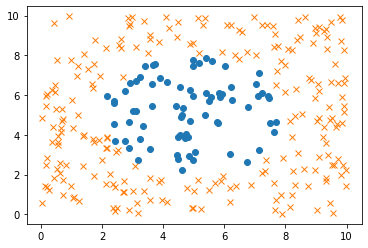

In [5]:
import matplotlib.pyplot as plt

x, y = generate_data(300)
p = x[y[:, 0] == 1]
n = x[y[:, 0] == 0]

plt.plot(p[:, 0], p[:, 1], 'o')
plt.plot(n[:, 0], n[:, 1], 'x')
plt.show()

### 定义sigmod激活函数

In [6]:
def sigmod(z):
    return 1 / (1 + np.exp(-z))

### 假设函数

In [7]:
def h_x(x, theta):
    return sigmod(x @ theta)

### 成本函数

In [8]:
def J_theta(h, y):
    m = len(y)
    cost = - (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) / m
    return cost[0, 0]

### 更新 $\Theta$

In [9]:
def update_theta(theta, alpha, x, y):
    m = len(y)
    theta = theta - alpha / m * (x.T @ (h_x(x, theta) - y))
    return theta

### 训练

In [10]:
def train(t):
    # 处理 bias
    x_b = np.c_[np.ones(x.shape[0]), x]
    # theta[0] ~ bias
    theta = np.random.rand(x_b.shape[1], 1)
    J_history = []
    for i in range(t):
        J = J_theta(h_x(x_b, theta), y)
        J_history.append(J)
        theta = update_theta(theta, 0.01, x_b, y)
    return theta, J_history

[[ 0.05473655]
 [-0.09798013]
 [-0.10351521]]


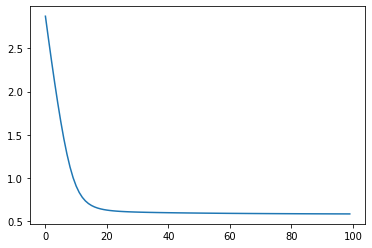

In [11]:
theta, J_history = train(100)
print(theta)

plt.plot(J_history)
plt.show()